# Histograms

[09:34:49] INFO - Showing image ... (13.31 x 20.48)
[09:34:49] INFO - Showing image ... (13.31 x 20.48)


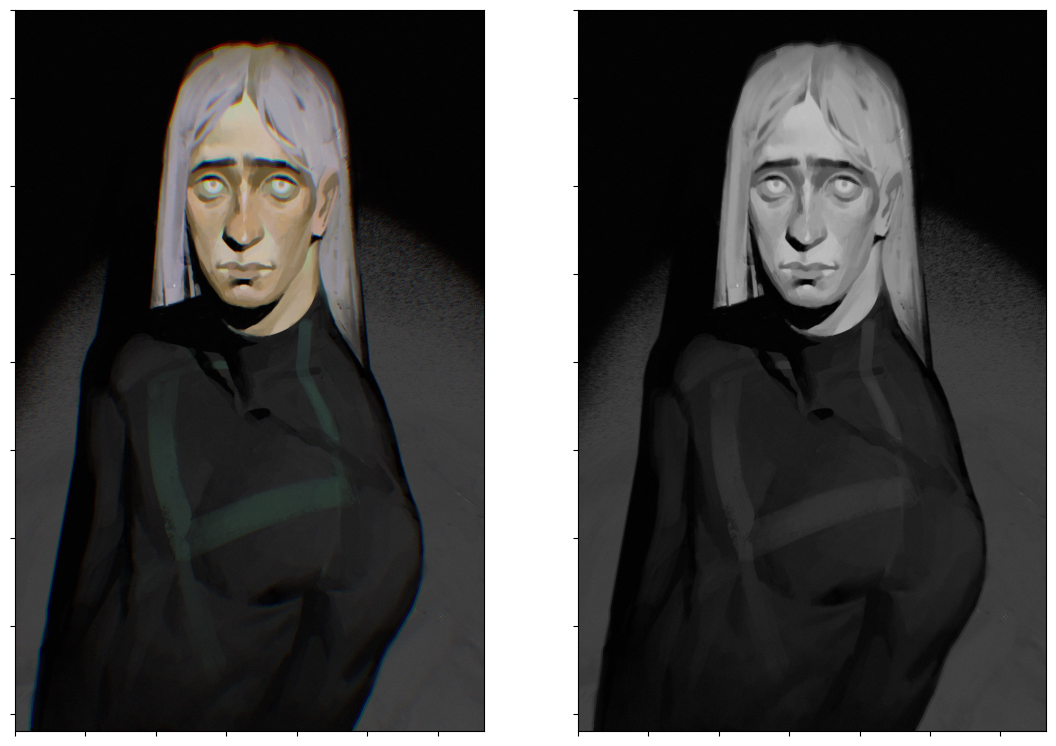

[09:34:50] INFO - Showing image ... (10.24 x 8.88)
[09:34:50] INFO - Showing image ... (10.24 x 8.88)


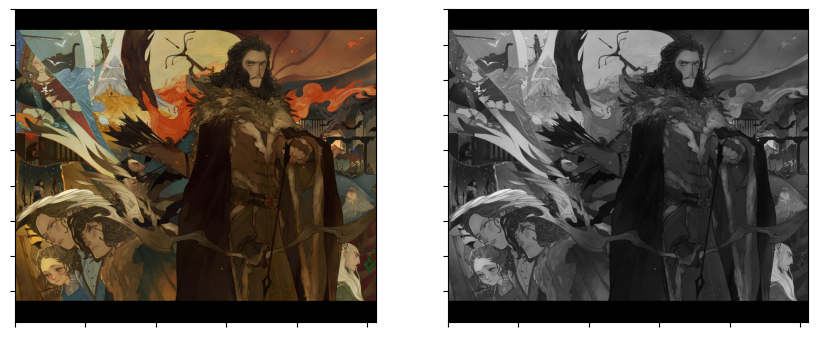

[09:34:50] INFO - Showing image ... (12.0 x 8.48)
[09:34:50] INFO - Showing image ... (12.0 x 8.48)


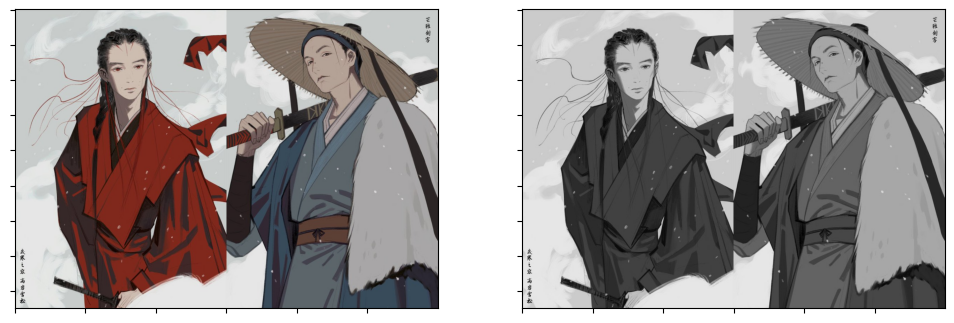

In [50]:
import os


import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import seaborn as sns

from custom_utils import *

import logging
logging.basicConfig(
    #  filename='log_file_name.log',
     level=logging.INFO, 
     format= '[%(asctime)s] %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
)

img_set = [
    (os.path.basename(fpath), load_image_and_show(fpath, scale=0.5))
    for fpath in ['../data/ptitsatart2.jpeg', '../data/wavesheep1.jpg', '../data/wavesheep2.jpeg']        
]

img_count = len(img_set)

## 1: Find, Plot, & Analyze

### Find Histogram

Using cv.calcHist

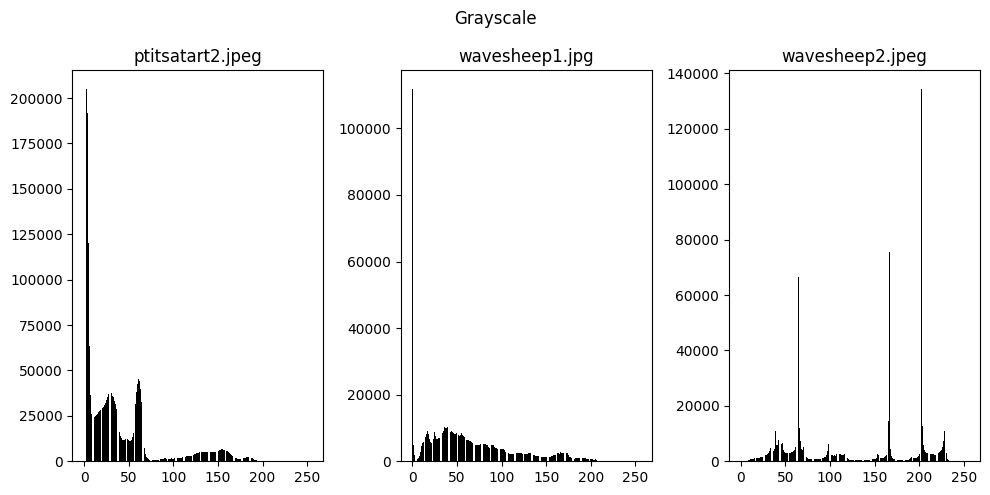

In [10]:
# using calcHist
fig, ax = plt.subplots(1, img_count, figsize=(10, 5))

for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_gray
    histo = cv.calcHist([img_], [0], None, [256], [0, 256])

    ax[i].bar(range(256), histo.reshape(-1), color='k')
    ax[i].set_title(basename)

fig.suptitle('Grayscale')
fig.tight_layout()

plt.show()

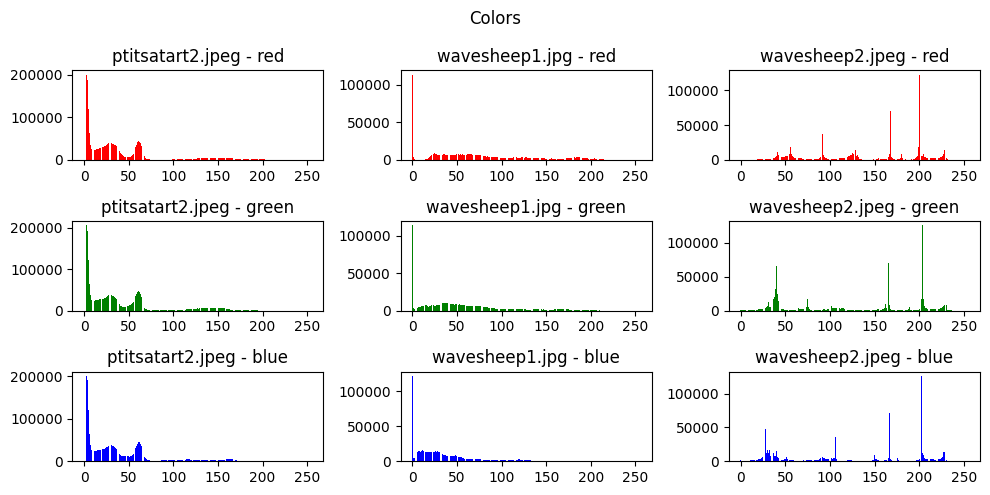

In [11]:
# using calcHist
fig, ax = plt.subplots(3, img_count, figsize=(10, 5))

clrs = ['red', 'green', 'blue']
for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_rgb
    for k in range(3):
        histo = cv.calcHist([img_], [k], None, [256], [0, 256])

        ax[k][i % img_count].bar(range(256), histo.reshape(-1), color=clrs[k])
        ax[k][i % img_count].set_title(f"{basename} - {clrs[k]}")

fig.suptitle('Colors')
fig.tight_layout()
histo[0]

plt.show()

Evaluate only masked area

[09:07:52] INFO - Showing image ... (13.31 x 20.48)
[09:07:52] INFO - Showing image ... (10.24 x 8.88)
[09:07:52] INFO - Showing image ... (12.0 x 8.48)


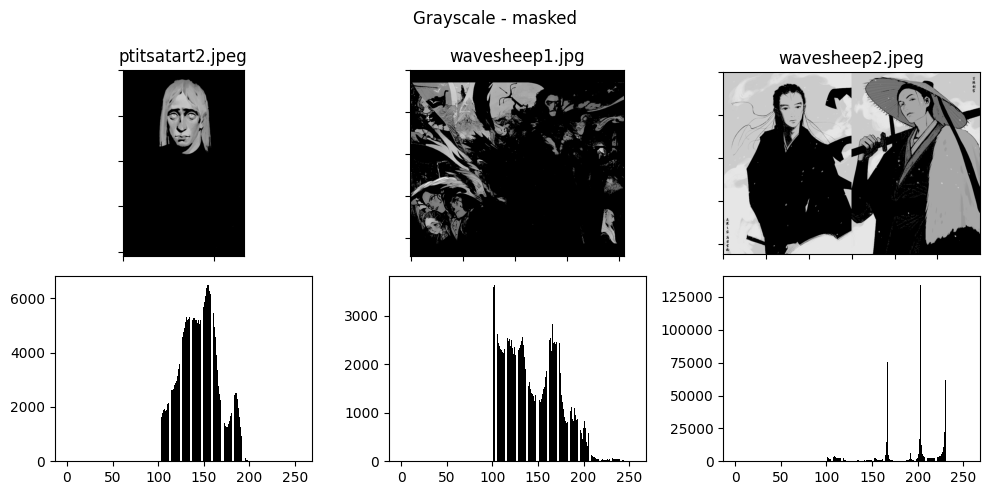

In [12]:
# using calcHist
fig, ax = plt.subplots(2, img_count, figsize=(10, 5))

for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_gray
    
    thresh_ = cv.threshold(img_, 100, 255, cv.THRESH_BINARY)[1]

    img_masked = cv.bitwise_and(img_, img_, mask=thresh_)

    histo = cv.calcHist([img_], [0], thresh_, [256], [0, 256])

    show_image(
        img_masked, ax=ax[0][i], title=f"{basename}", imshow_args={'cmap': 'gray'}
    )
    ax[1][i].bar(range(256), histo.reshape(-1), color='k')

fig.suptitle('Grayscale - masked')
fig.tight_layout()

plt.show()

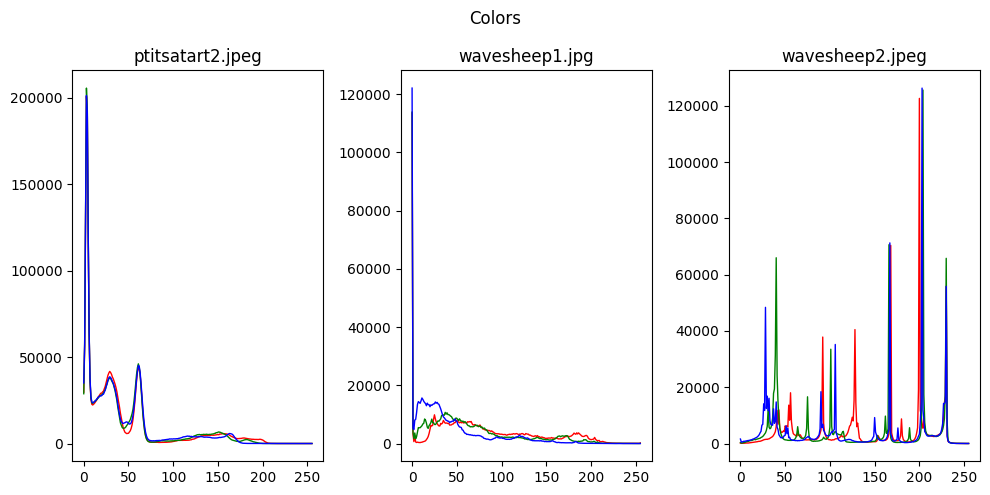

In [13]:
# using calcHist
fig, ax = plt.subplots(1, img_count, figsize=(10, 5))

clrs = ['red', 'green', 'blue']
for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_rgb
    for k in range(3):
        histo = cv.calcHist([img_], [k], None, [256], [0, 256])

        ax[i % img_count].plot(range(256), histo.reshape(-1), color=clrs[k], lw=1)
        ax[i % img_count].set_title(f"{basename}")

fig.suptitle('Colors')
fig.tight_layout()
histo[0]

plt.show()

Using numpy

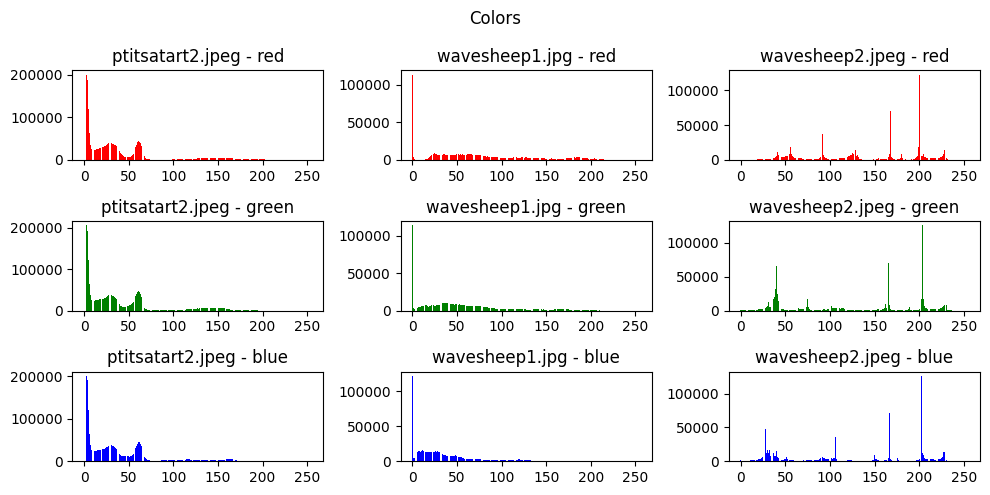

In [14]:
# using calcHist
fig, ax = plt.subplots(3, img_count, figsize=(10, 5))

clrs = ['red', 'green', 'blue']
for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_rgb
    for k in range(3):
        hist, bins = np.histogram(img_rgb[:, :, k].ravel(), 256, [0, 256])

        ax[k][i % img_count].bar(bins[:-1], hist, color=clrs[k])
        ax[k][i % img_count].set_title(f"{basename} - {clrs[k]}")

fig.suptitle('Colors')
fig.tight_layout()
histo[0]

plt.show()

## 2: Histogram Equalization

> I should be going over how the algorithm works ... but that stuff is for later ... (TODO)

> So, TODO: https://en.wikipedia.org/wiki/Histogram_equalization

> For now, just know that the algorithm involves calculating probabilities and then using those probabilities to calculate the new pixel values.

[09:07:55] INFO - Showing image ... (13.31 x 20.48)
[09:07:56] INFO - Showing image ... (13.31 x 20.48)
[09:07:56] INFO - Showing image ... (13.31 x 20.48)
[09:07:56] INFO - Showing image ... (10.24 x 8.88)
[09:07:56] INFO - Showing image ... (10.24 x 8.88)
[09:07:56] INFO - Showing image ... (10.24 x 8.88)
[09:07:56] INFO - Showing image ... (12.0 x 8.48)
[09:07:56] INFO - Showing image ... (12.0 x 8.48)
[09:07:56] INFO - Showing image ... (12.0 x 8.48)


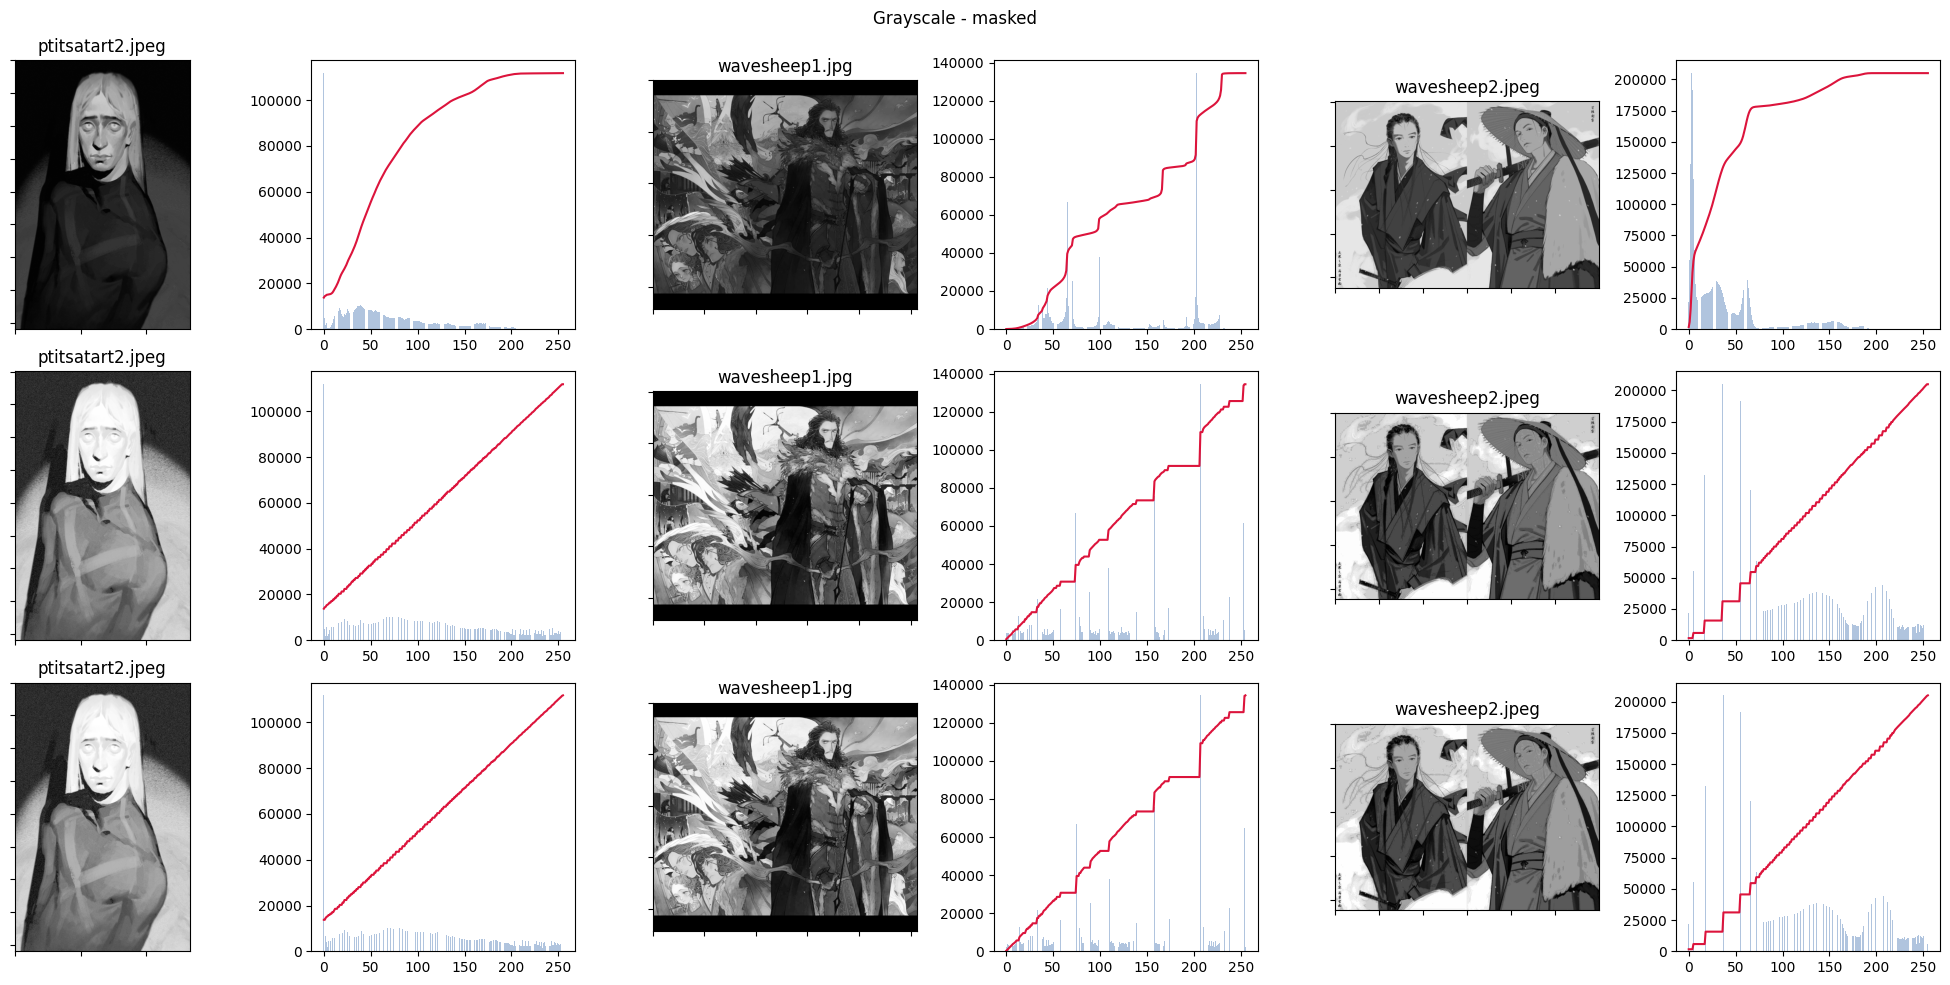

In [15]:
# using calcHist
fig, ax = plt.subplots(3, img_count*2, figsize=(20, 10))

for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_gray

    # Original grayscale image
    histo = cv.calcHist([img_], [0], None, [256], [0, 256])

    cdf = histo.cumsum()
    cdf_normalized = cdf * float(histo.max()) / cdf.max()

    show_image(
        img_, ax=ax[0][i*2], title=f"{basename}", imshow_args={'cmap': 'gray'}
    )
    ax[0][(i*2)-1].plot(cdf_normalized, color='crimson', label = 'cdf')
    ax[0][(i*2)-1].bar(range(256), histo.reshape(-1), color='lightsteelblue')

    # Manual application of equalizer
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    histo = cv.calcHist([cdf[img_]], [0], None, [256], [0, 256])

    show_image(
        cdf[img_], ax=ax[1][i*2], title=f"{basename}", imshow_args={'cmap': 'gray'}
    )
    cdf = histo.cumsum()
    cdf_normalized = cdf * float(histo.max()) / cdf.max()
    ax[1][(i*2)-1].plot(cdf_normalized, color='crimson', label = 'cdf')
    ax[1][(i*2)-1].bar(range(256), histo.reshape(-1), color='lightsteelblue')

    # OpenCV equalizer
    new_img = cv.equalizeHist(img_)
    histo = cv.calcHist([new_img], [0], None, [256], [0, 256])
    cdf = histo.cumsum()
    cdf_normalized = cdf * float(histo.max()) / cdf.max()
    
    show_image(
        new_img, ax=ax[2][i*2], title=f"{basename}", imshow_args={'cmap': 'gray'}
    )
    ax[2][(i*2)-1].plot(cdf_normalized, color='crimson', label = 'cdf')
    ax[2][(i*2)-1].bar(range(256), histo.reshape(-1), color='lightsteelblue')

fig.suptitle('Grayscale - masked')
fig.tight_layout()

plt.show()

CLAHE (Contrast Limited Adaptive Histogram Equalization)

- We will apply on first image, since we see how the basic histogram equalization is erasing the eyes.

> I am fascinations by the result

[09:07:58] INFO - Showing image ... (2.662 x 4.096)
[09:07:58] INFO - Showing image ... (2.662 x 4.096)


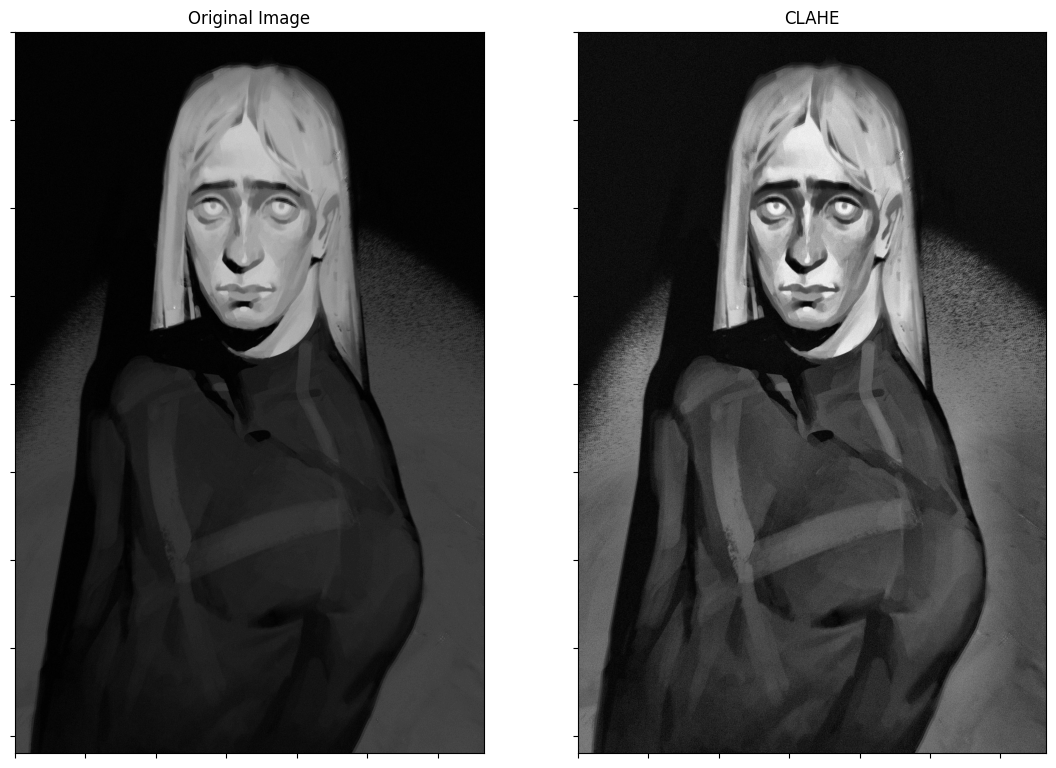

In [16]:
_, data = img_set[0]
height, width, img, img_rgb, img_gray = data 

# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img_gray)

titles = ['Original Image', 'CLAHE']
_, ax = plt.subplots(1, 2, figsize=(width*2/2/100, height/2/100))
for i, im in enumerate([img_gray, cl1]):
    show_image(im, ax=ax[i], title=titles[i], imshow_args={'cmap': 'gray'}, scale=.2)
plt.show()

## 3: 2D Histogram

- 2D Histograms are basically heatmaps of the image
- when we generate 2D histogram using cv.calcHist, each cell is the count
    of the number of pixels that fall into that bin (Saturation x Hue)

[09:35:13] INFO - Showing image ... (12.0 x 8.48)


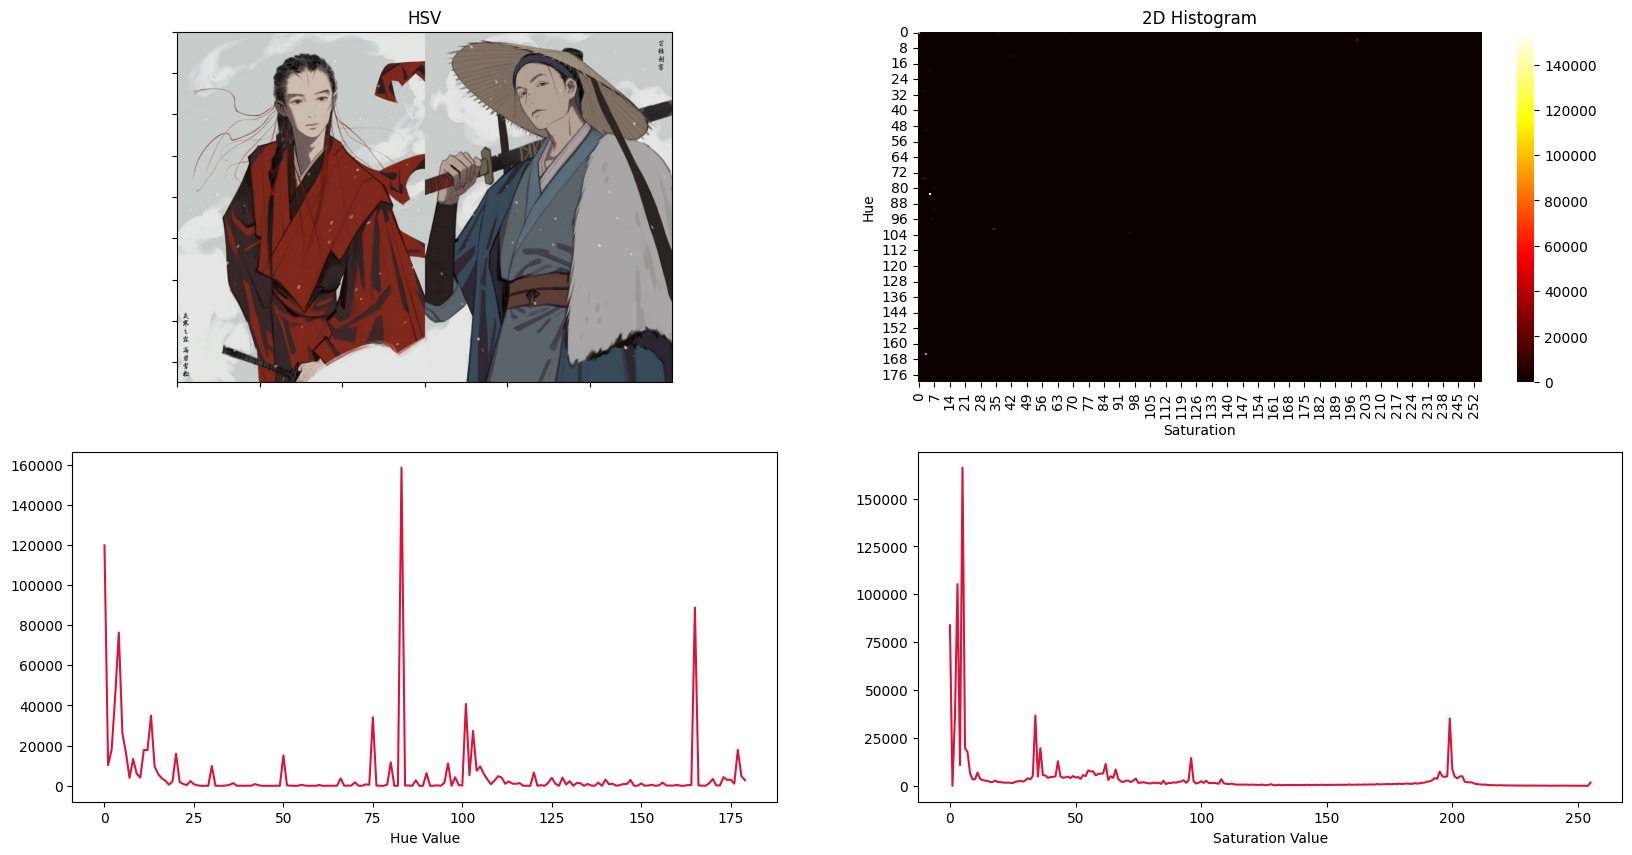

In [51]:
# _, data = img_set[2]
height, width, img, img_rgb, img_gray = data

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hist = cv.calcHist([img_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

_, ax = plt.subplots(2, 2, figsize=(20, 10))
show_image(cv.cvtColor(img_hsv, cv.COLOR_HSV2RGB), ax=ax[0][0], title='HSV')
# ax[0][1].imshow(hist, interpolation = 'nearest', cmap='hot')
sns.heatmap(hist, ax=ax[0][1], cmap='hot')
ax[0][1].set_xlabel('Saturation')
ax[0][1].set_ylabel('Hue')
ax[0][1].set_title("2D Histogram")

# Hue and saturation separately
hist_hue = cv.calcHist([img_hsv], [0], None, [180], [0, 180])
ax[1][0].plot(hist_hue, color='crimson')
ax[1][0].set_xlabel('Hue Value')

hist_sat = cv.calcHist([img_hsv], [1], None, [256], [0, 256])
ax[1][1].plot(hist_sat, color='crimson', label = 'cdf')
ax[1][1].set_xlabel('Saturation Value')

plt.show()

The heatmap looks weird because some Hue-Saturation combinations are simply more extreme than
most around it ... so we will try equalize it here. I read somewhere how to do it but for now
let's just do this instinctively because I am lazy

[10:01:28] INFO - Showing image ... (12.0 x 8.48)


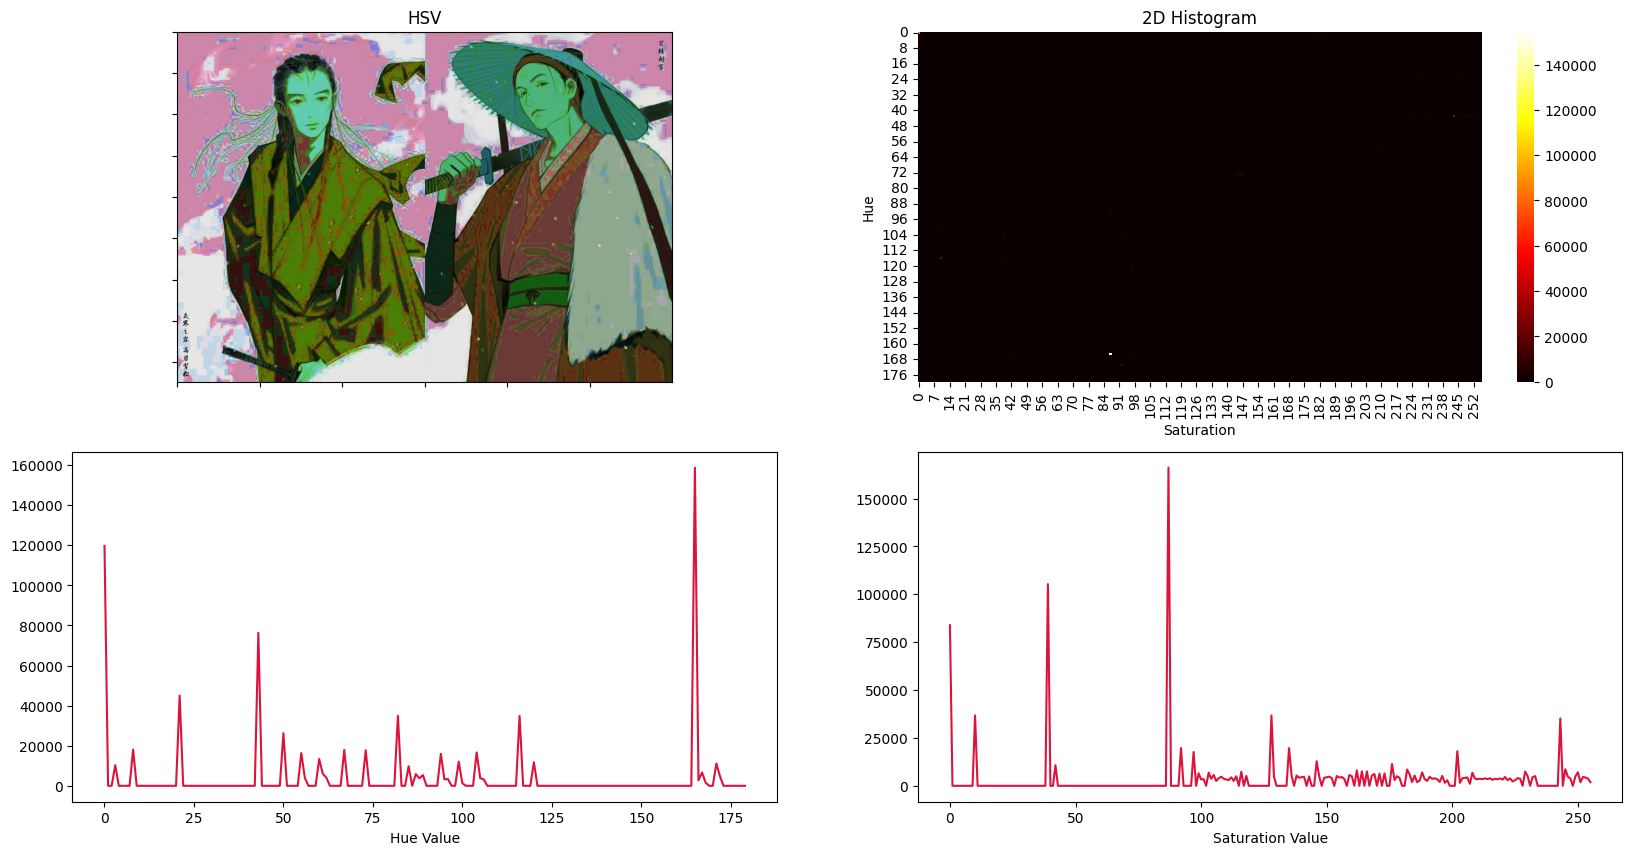

In [69]:
# _, data = img_set[2]
height, width, img, img_rgb, img_gray = data

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)


_, ax = plt.subplots(2, 2, figsize=(20, 10))

# separate the hue, saturation and value channels
h, s, v = cv.split(img_hsv)
# now, we treat the hue and saturation channels as if they were grayscale images
# and apply histogram equalization to them
equs = [cv.equalizeHist(channel) for channel in [h, s]] + [v]
img_equ = np.stack(equs, axis=2)

show_image(cv.cvtColor(img_equ, cv.COLOR_HSV2RGB), ax=ax[0][0], title='HSV')

# ax[0][1].imshow(hist, interpolation = 'nearest', cmap='hot')
hist = cv.calcHist([img_equ], [0, 1], None, [180, 256], [0, 180, 0, 256])
sns.heatmap(hist, ax=ax[0][1], cmap='hot')
ax[0][1].set_xlabel('Saturation')
ax[0][1].set_ylabel('Hue')
ax[0][1].set_title("2D Histogram")

# Hue and saturation separately
hist_hue = cv.calcHist([img_equ], [0], None, [180], [0, 180])
ax[1][0].plot(hist_hue, color='crimson')
ax[1][0].set_xlabel('Hue Value')

hist_sat = cv.calcHist([img_equ], [1], None, [256], [0, 256])
ax[1][1].plot(hist_sat, color='crimson', label = 'cdf')
ax[1][1].set_xlabel('Saturation Value')

plt.show()